In [1]:
from cube import Cube
import numpy as np
from random import uniform, sample
from matplotlib import pyplot as plt
from make_cubes import insert_gal, prep_gal
import gc
from os import listdir

## Load and Visualise Data

  'DEGREE' -> 'deg',
  'DEGREE' -> 'deg',
  'HZ' -> 'Hz'. [astropy.wcs.wcs]


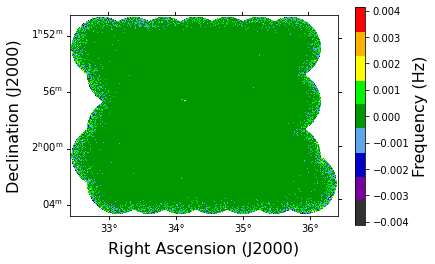

In [2]:
noise_cube = Cube('data/mosaics/1245mosC.derip.fits')
noise_cube.load_cube()
noise_cube.plot_slice(slice_i=471, sliced=True)
cube_header = noise_cube.header
cube_data = noise_cube.cube_data
# Delete noise cube to free up memory
del(noise_cube)
gc.collect()
dim = (512, 512)
empty_cube = np.zeros(cube_data.shape)

In [3]:
# Choose a random sample of mock galaxies
no_gals = int(uniform(2, 6))
gal_dir = 'data/mock_gals'
gals = sample([i for i in listdir(gal_dir) if ".fits" in i], no_gals)
# [insert_gal(i, no_gals, gal_dir + "/"+f, subcube, cube_header, empty_cube, dim, reproject=True, scale=True) for i, f in enumerate(gals)]
gals

['model1000.fits', 'model1006.fits', 'model900.fits']

In [4]:
smoothed_gals = [prep_gal(
    i, no_gals, gal_dir + "/"+f, dim, cube_header
    ) for i, f in enumerate(gals)]

  'DEGREE' -> 'deg',
  'DEGREE' -> 'deg',
  'HZ' -> 'Hz'. [astropy.wcs.wcs]


66% smoothed

In [5]:
[insert_gal(i, no_gals, g, cube_data, empty_cube, dim) for i, g in enumerate(smoothed_gals)]

66%

[None, None, None]

# Traditional Methods

## Thresholding

In [ ]:
masked = source_slice > np.mean(source_slice) + 3*np.std(source_slice)
plot_slice(source_slice, hi_data, mask=masked)

## Region-based segmentation


In [ ]:
elevation_map = filters.sobel(source_slice)
markers = np.zeros_like(source_slice)
markers[source_slice < 0.001] = 1
markers[source_slice > 0.002] = 2
segmentated = segmentation.watershed(elevation_map, markers)
segmentated = ndi.binary_fill_holes(segmentated - 1)
plot_slice(source_slice, hi_data, segmentated)

## Edge-based segmentation

In [ ]:
edges = canny(source_slice)
fill = ndi.binary_fill_holes(edges)
cleaned = morphology.remove_small_objects(fill, 10)
plot_slice(source_slice, hi_data, mask=cleaned)

# Unspervised Segmentation

## K Means Clustering

In [ ]:
# kmeans = KMeans(n_clusters=3, random_state=0).fit(source_slice)
# cluster_pic = kmeans.cluster_centers_[kmeans.labels_]
# plot_slice(source_slice, hi_data, cluster_pic)

## Supervised Learning

## Random Forests